In [1]:
!pip install geopandas

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install plotly


Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install numpy pandas seaborn matplotlib statsmodels scikit-learn yellowbrick shapely 


Defaulting to user installation because normal site-packages is not writeable


In [4]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from geopandas import GeoDataFrame
from shapely.geometry import Point
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

print("Imports ok")

Imports ok


In [5]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)


In [6]:
data=pd.read_csv("C:/Users/MrWhi/OneDrive/Desktop/univpm/DataScience/Progetto_Datascience/python/us accident/US_Accidents_March23.csv")
data.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [7]:
data.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [9]:
data.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [10]:
data.duplicated().sum()
data.drop_duplicates()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.010,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.010,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,0.543,...,False,False,False,False,False,False,Day,Day,Day,Day
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,0.338,...,False,False,False,False,False,False,Day,Day,Day,Day
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,0.561,...,False,False,False,False,False,False,Day,Day,Day,Day
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,0.772,...,False,False,False,False,False,False,Day,Day,Day,Day


In [11]:
missing_values = data.isnull().sum()
missing_values = missing_values.sort_values(ascending = False)
missing_values

End_Lat                  3402762
End_Lng                  3402762
Precipitation(in)        2203586
Wind_Chill(F)            1999019
Wind_Speed(mph)           571233
Visibility(mi)            177098
Wind_Direction            175206
Humidity(%)               174144
Weather_Condition         173459
Temperature(F)            163853
Pressure(in)              140679
Weather_Timestamp         120228
Nautical_Twilight          23246
Civil_Twilight             23246
Sunrise_Sunset             23246
Astronomical_Twilight      23246
Airport_Code               22635
Street                     10869
Timezone                    7808
Zipcode                     1915
City                         253
Description                    5
Traffic_Signal                 0
Roundabout                     0
Station                        0
Stop                           0
Traffic_Calming                0
Country                        0
Turning_Loop                   0
No_Exit                        0
End_Time  

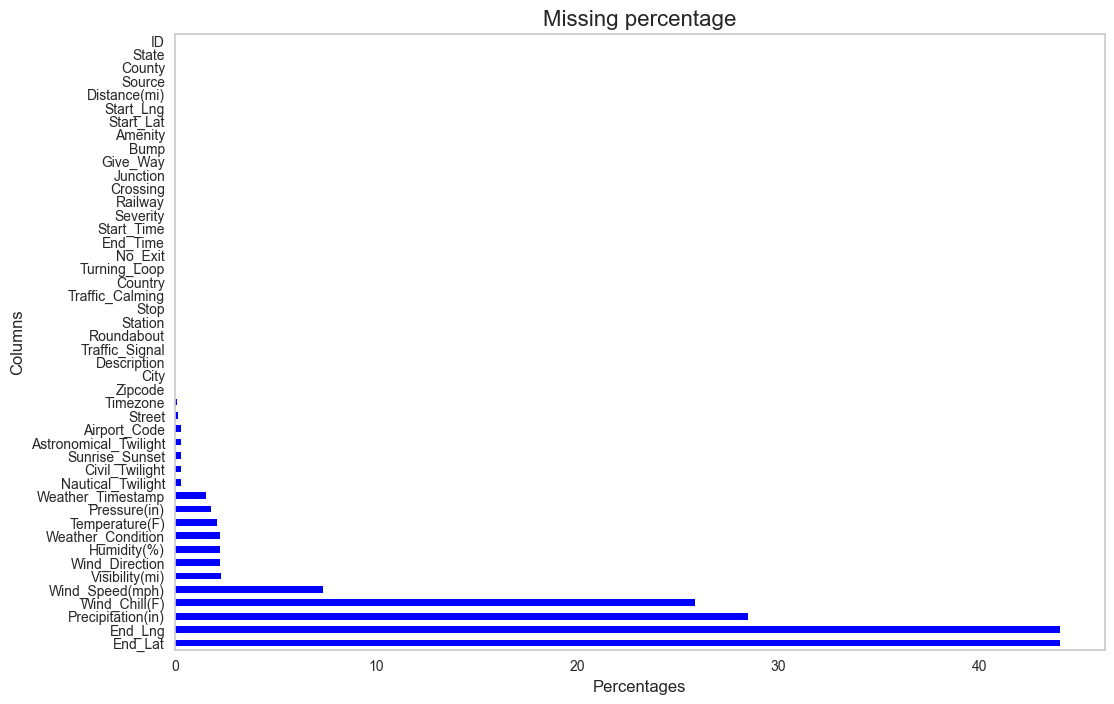

In [12]:
missing_percentage = data.isnull().sum().sort_values(ascending=False)/len(data)*100
plt.figure(figsize=(12, 8))

missing_percentage.plot(kind='barh', color='blue')

plt.title('Missing percentage', fontsize=16)
plt.xlabel('Percentages', fontsize=12)
plt.ylabel('Columns', fontsize=12)
plt.grid(False)
plt.show()


In [13]:
city = data.City.unique()
len(city)

13679

In [14]:
city_by_accident = data.City.value_counts()
city_by_accident

City
Miami                           186917
Houston                         169609
Los Angeles                     156491
Charlotte                       138652
Dallas                          130939
                                 ...  
Benkelman                            1
Old Appleton                         1
Wildrose                             1
Mc Nabb                              1
American Fork-Pleasant Grove         1
Name: count, Length: 13678, dtype: int64

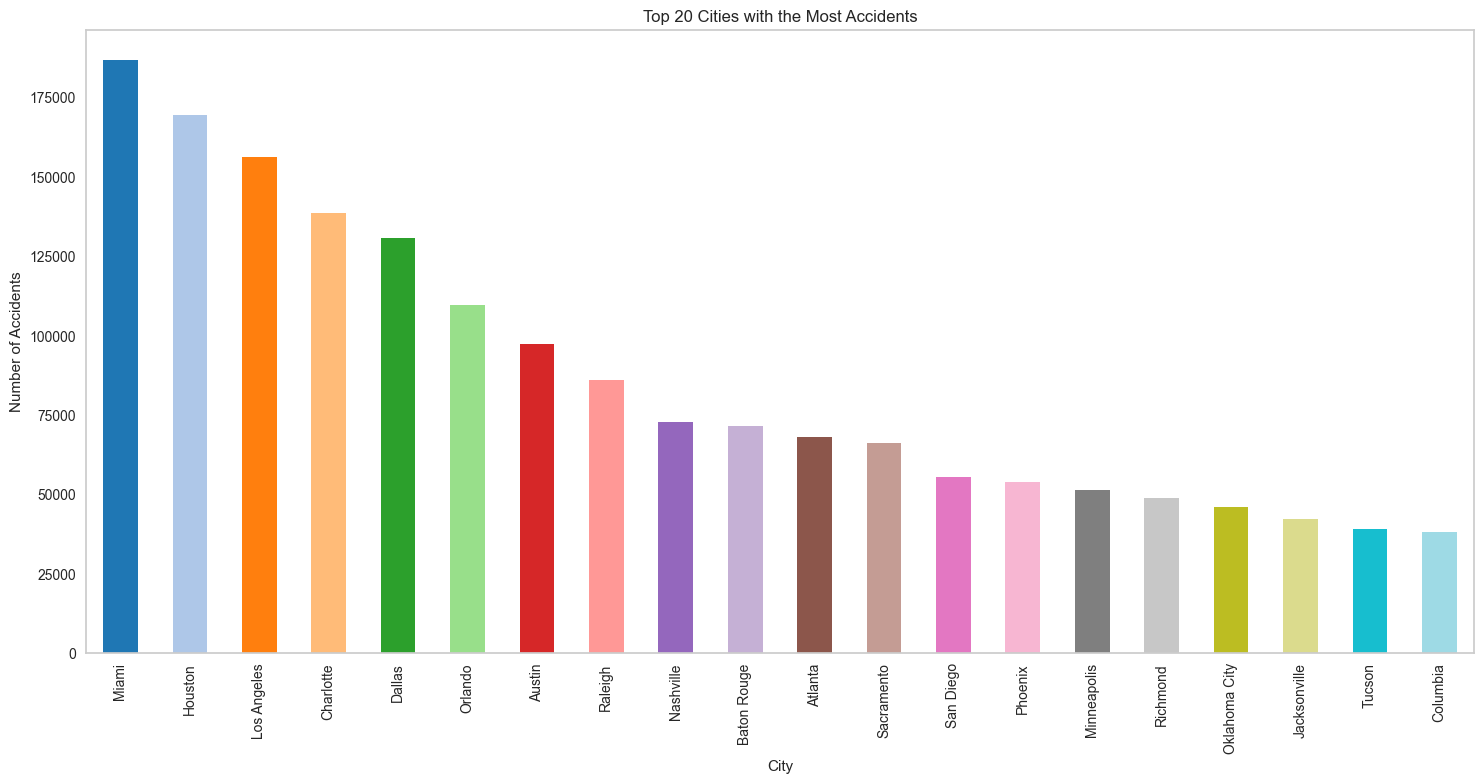

In [15]:
city_accident = data.City.value_counts()

top_20_cities = city_accident.head(20)

# Create the bar plot
plt.figure(figsize=(15, 8))
color_range = range(50)
top_20_cities.plot(kind='bar', color=plt.get_cmap('tab20')(range(len(color_range))))

plt.title('Top 20 Cities with the Most Accidents')
plt.xlabel('City')
plt.ylabel('Number of Accidents')
plt.grid(False)
# Show the bar plot
plt.tight_layout()
plt.show()


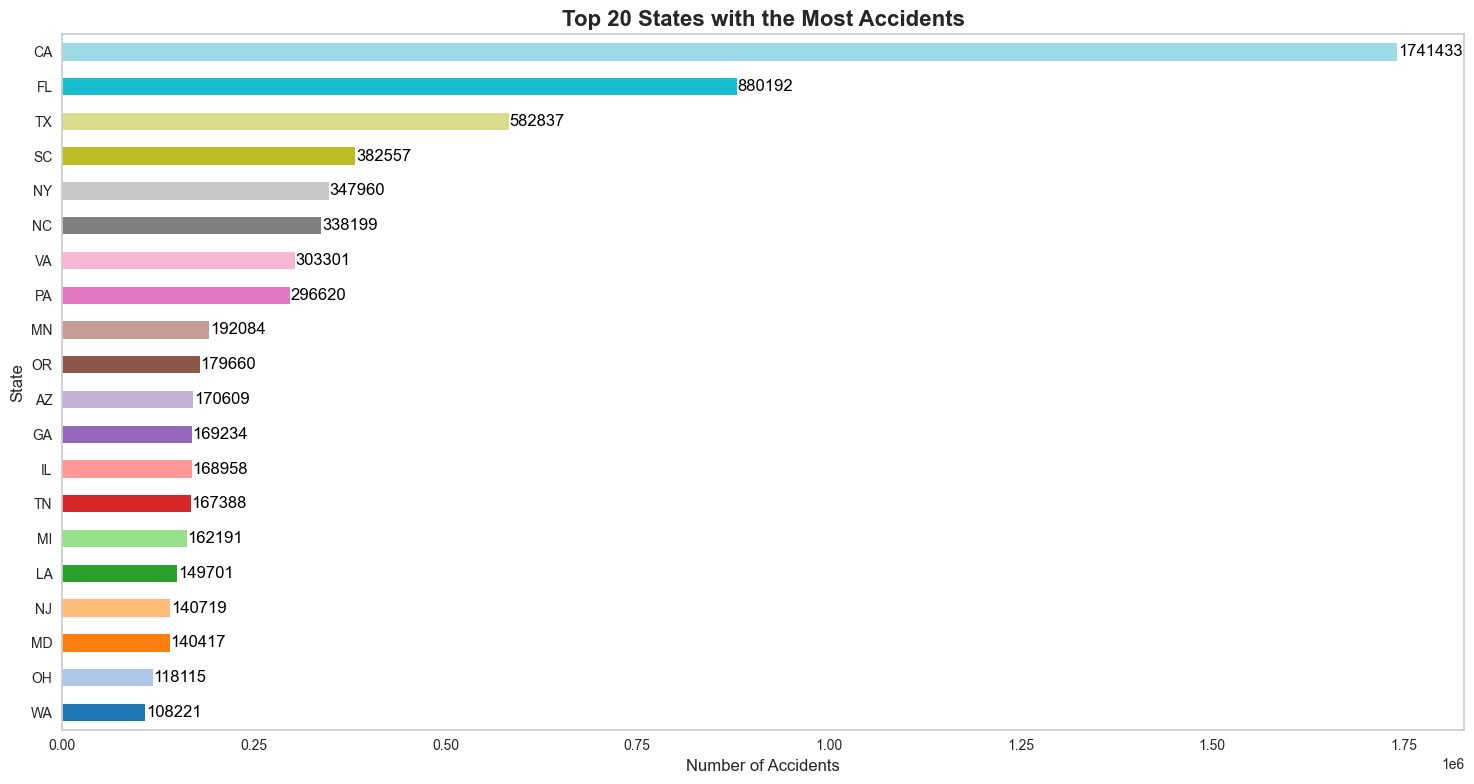

In [43]:
import matplotlib.pyplot as plt

# Calcola la frequenza degli stati
state_accident = data['State'].value_counts()

# Seleziona i primi 20 stati con il maggior numero di incidenti
top_20_states = state_accident.head(20)

# Ordina i dati in modo che lo stato con il numero massimo di incidenti sia in cima
top_20_states = top_20_states.sort_values(ascending=True)

# Creazione del grafico a barre orizzontali
plt.figure(figsize=(15, 8))
top_20_states.plot(kind='barh', color=plt.get_cmap('tab20')(range(len(top_20_states))))

# Aggiungi numeri degli incidenti sopra le barre
for index, value in enumerate(top_20_states):
    plt.text(value + 1000, index, f'{value}', va='center', fontsize=12, color='black')

# Aggiungi titolo e etichette
plt.title('Top 20 States with the Most Accidents', fontsize=16, fontweight='bold')
plt.xlabel('Number of Accidents', fontsize=12)
plt.ylabel('State', fontsize=12)

# Imposta lo sfondo bianco
plt.gcf().set_facecolor('white')
plt.gca().set_facecolor('white')


# Disattiva la griglia
plt.grid(False)
# Ottimizza la disposizione delle etichette
plt.tight_layout()

# Mostra il grafico
plt.show()





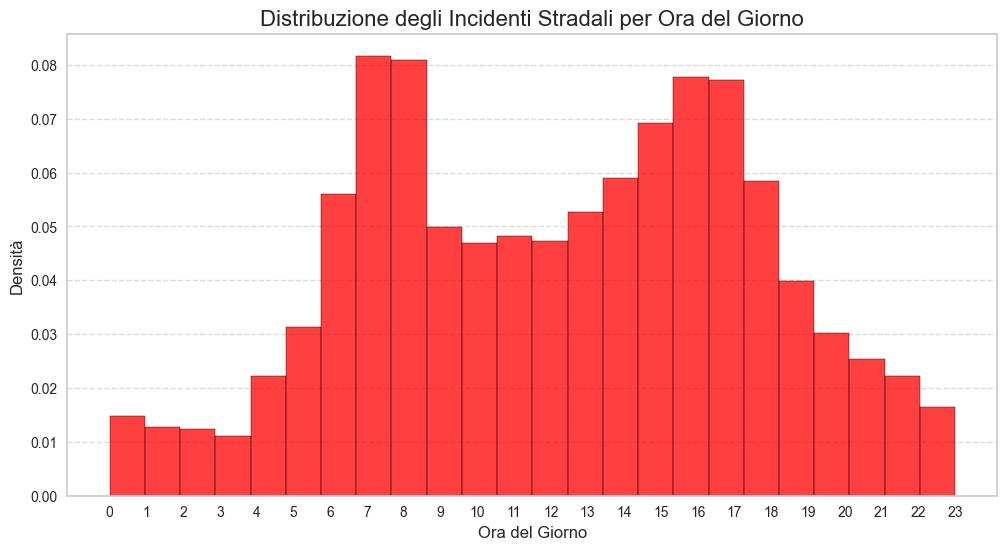

In [17]:

# Conversione della colonna 'Start_Time' in formato datetime
data.Start_Time = pd.to_datetime(data['Start_Time'], errors='coerce')

# Creazione dell'istogramma migliorato
plt.figure(figsize=(12, 6))
sns.histplot(
   data['Start_Time'].dt.hour, 
    bins=24, 
    kde=False, 
    stat='density', 
    color='red', 
    edgecolor='black'
)

# Miglioramento estetico e aggiunta di etichette
plt.title('Distribuzione degli Incidenti Stradali per Ora del Giorno', fontsize=16)
plt.xlabel('Ora del Giorno', fontsize=12)
plt.ylabel('Densità', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(False)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostra il grafico
plt.show()


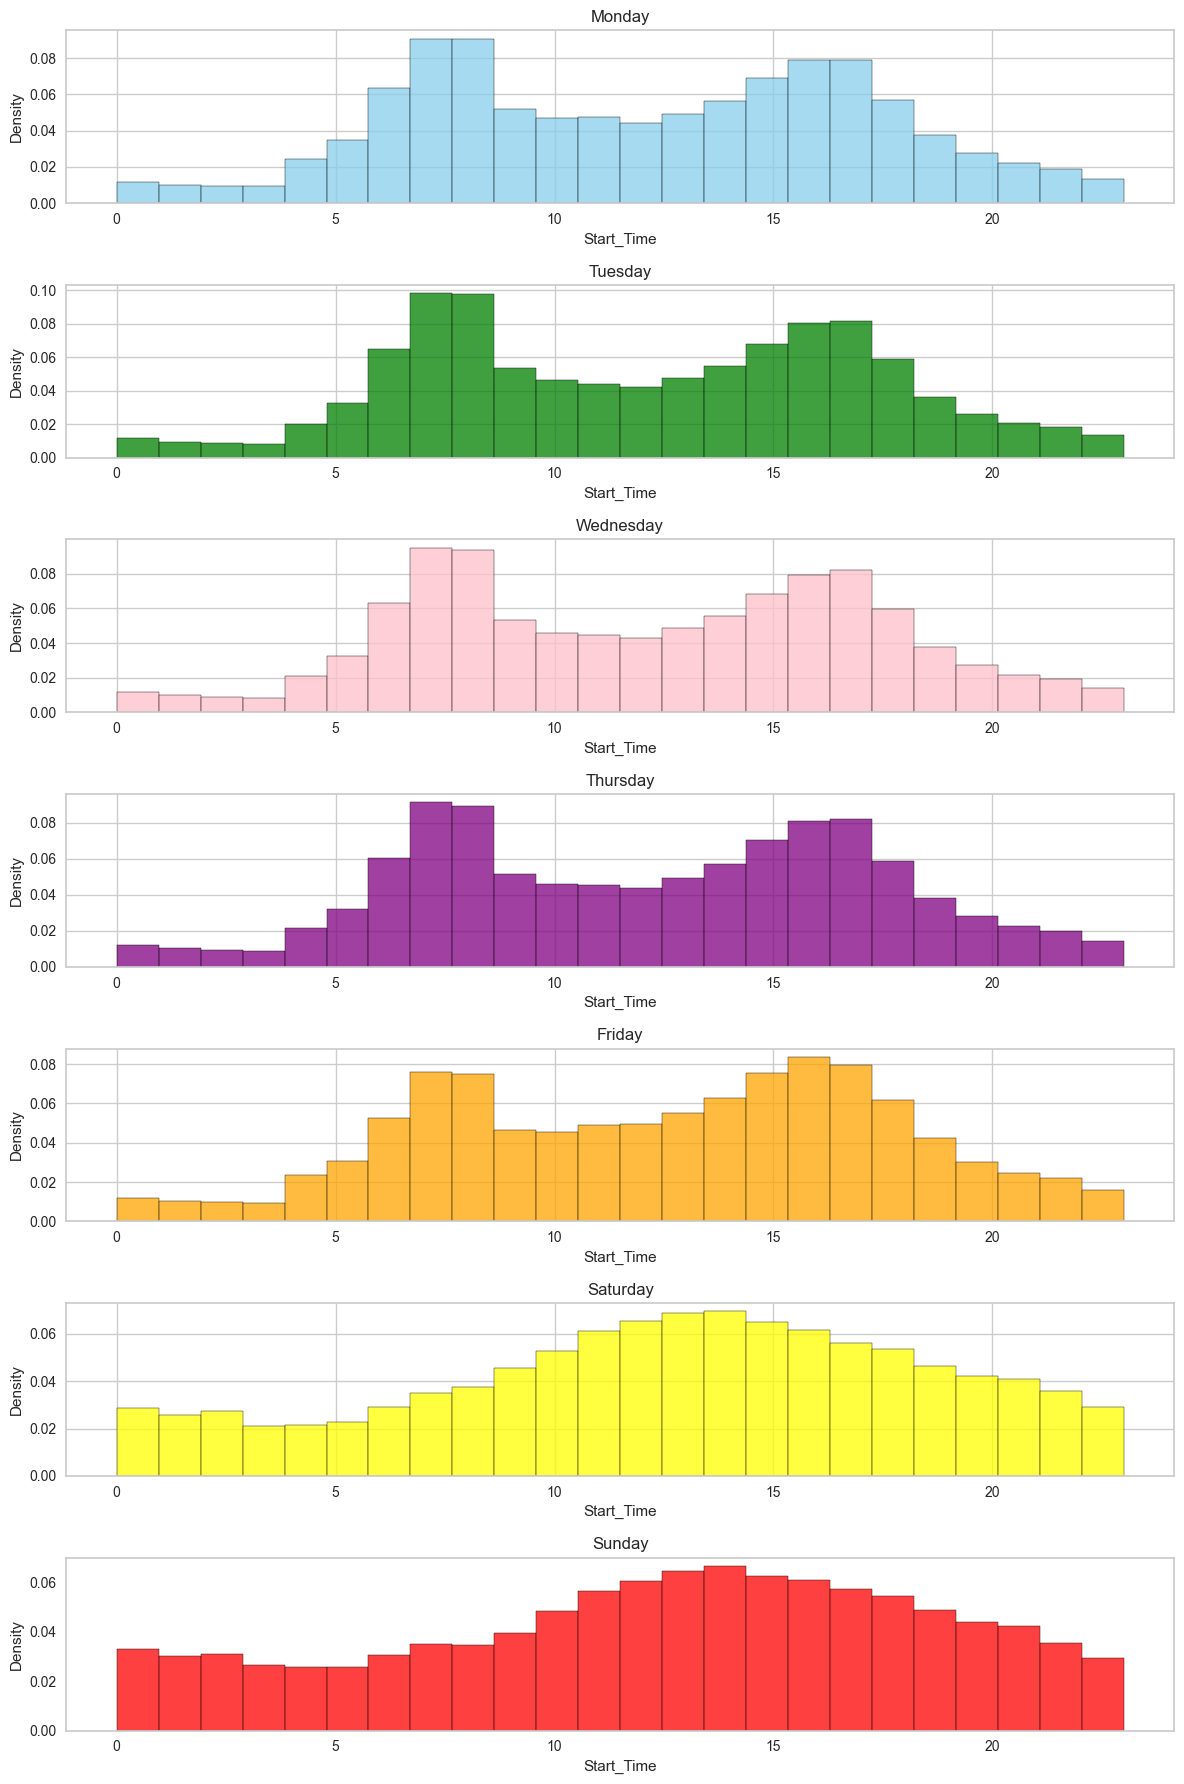

In [18]:
# Conversione della colonna 'Start_Time' in formato datetime (assicurati che la colonna sia già in formato datetime)
data['Start_Time'] = pd.to_datetime(data['Start_Time'], errors='coerce')

# Creazione dei filtri per ciascun giorno della settimana (0 = Lunedì, 1 = Martedì, ..., 6 = Domenica)
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
colors = ['skyblue', 'green', 'pink', 'purple', 'orange', 'yellow', 'red']
day_data = [data.Start_Time[data.Start_Time.dt.dayofweek == i] for i in range(7)]

# Creazione della figura con 7 sottotrame per i 7 giorni
fig, axis = plt.subplots(7, 1, figsize=(12, 18))

# Loop per ciascun giorno e creazione degli istogrammi
for i in range(7):
    sns.histplot(day_data[i].dt.hour, bins=24, kde=False, stat='density', ax=axis[i], color=colors[i]).set_title(days[i])

fig.tight_layout()
plt.grid(False)
# Mostra il grafico
plt.show()

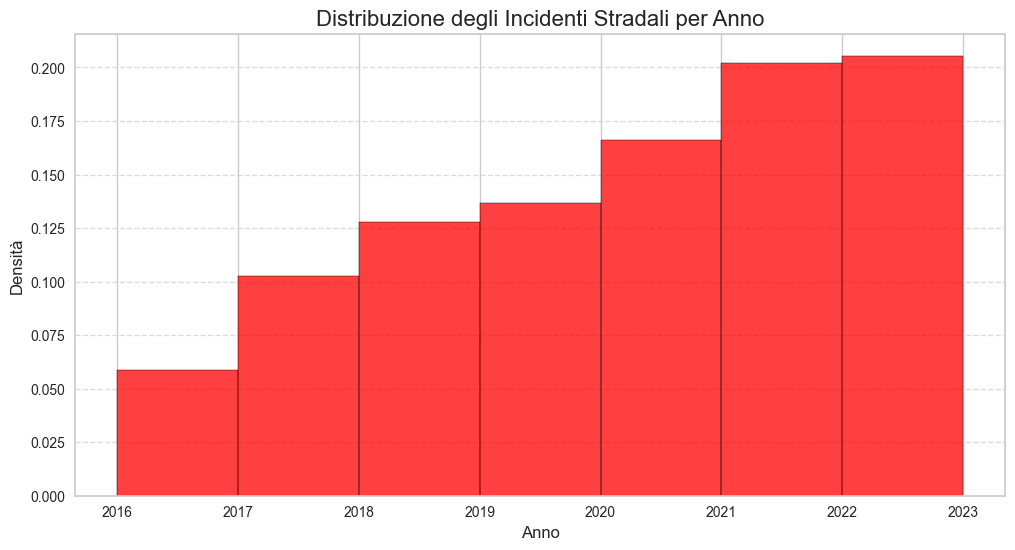

In [19]:
# Estrazione dell'anno dalla colonna 'Start_Time'
data['Year'] = data['Start_Time'].dt.year

# Creazione dell'istogramma per l'anno
plt.figure(figsize=(12, 6))
sns.histplot(
    data['Year'], 
    bins=range(int(data['Year'].min()), int(data['Year'].max()) + 1),  # Imposta i bin per ogni anno
    kde=False, 
    stat='density', 
    color='red', 
    edgecolor='black'
)
# Miglioramento estetico e aggiunta di etichette
plt.title('Distribuzione degli Incidenti Stradali per Anno', fontsize=16)
plt.xlabel('Anno', fontsize=12)
plt.ylabel('Densità', fontsize=12)
plt.xticks(range(int(data['Year'].min()), int(data['Year'].max()) + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Mostra il grafico
plt.show()

In [27]:
data.Start_Lat

0          39.865147
1          39.928059
2          39.063148
3          39.747753
4          39.627781
             ...    
7728389    34.002480
7728390    32.766960
7728391    33.775450
7728392    33.992460
7728393    34.133930
Name: Start_Lat, Length: 7728394, dtype: float64

In [28]:
data.Start_Lng

0          -84.058723
1          -82.831184
2          -84.032608
3          -84.205582
4          -84.188354
              ...    
7728389   -117.379360
7728390   -117.148060
7728391   -117.847790
7728392   -118.403020
7728393   -117.230920
Name: Start_Lng, Length: 7728394, dtype: float64

<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

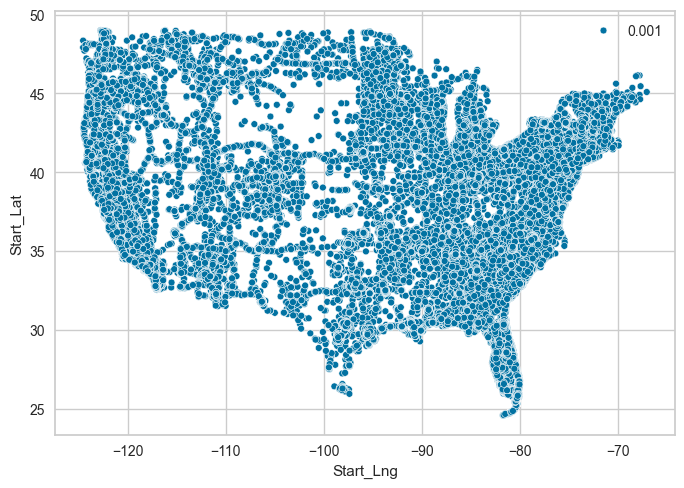

In [29]:
sample_data = data.sample(int(0.1 * len(data)))
sns.scatterplot(x=sample_data.Start_Lng, y=sample_data.Start_Lat, size=0.001)

In [31]:
# Calcolo del numero di incidenti per stato
state_count_acc = data.value_counts(data['State'])

# Creazione del grafico a mappa
fig = go.Figure(data=go.Choropleth(
    locations=state_count_acc.index,
    z = state_count_acc.values.astype(float),
    locationmode = 'USA-states',
    colorscale = 'YlOrRd',  # Cambia qui con la palette che preferisci
    colorbar_title = "Count Accidents",
))

# Aggiornamento del layout
fig.update_layout(
    title_text = '2016 - 2023 US Traffic Accident Dataset by State',
    geo_scope='usa',
)

# Mostra il grafico
fig.show()